In [5]:
from scipy.io import wavfile
from IPython.display import Audio

path="D:\\Zaids Work\\Signal processing with AI\\new data\\male1.wav"

fs,Audio_data=wavfile.read(path)

Audio(Audio_data,rate=fs)

In [15]:
!pip install librosa

  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached audioread-3.1.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached soundfile-0.13.1-py2.py3-none-win_amd64.whl.metadata (16 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached soxr-1.0.0-cp312-abi3-win_amd64.whl.metadata (5.6 kB)
  Using cached standard_aifc-3.13.0-py3-none-any.whl.metadata (969 bytes)
  Using cached standard_sunau-3.13.0-py3-none-any.whl.metadata (914 bytes)
  Using cached standard_chunk-3.13.0-py3-none-any.whl.metadata (860 bytes)
  Using cached audioop_lts-0.2.2-cp313-abi3-win_amd64.whl.metadata (2.0 kB)
Using cached librosa-0.11.0-py3-none-any.whl (260 kB)
Using cached audioread-3.1.0-py3-none-any.whl (23 kB)
Using cached pooch-1.8.2-py3-none-any.whl (64 kB)
Using cached soundfile-0.13.1-py2.py3-none-win_amd64.whl (1.0 MB)
Using cached soxr-1.0.0-cp312-abi3-win_amd64.whl (172 kB)
Using cached standard_aifc-3.13.0-py3-none-any.whl (10 kB)
Using cached audioop_l

In [16]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
import IPython.display as ipd


In [17]:
y,sr=librosa.load(path)
print(sr)
print(y.shape)
print('duration',len(y)/sr)
ipd.Audio(y,rate=sr)


22050
(185661,)
duration 8.42


## TIME DOMAIN DISPLAY


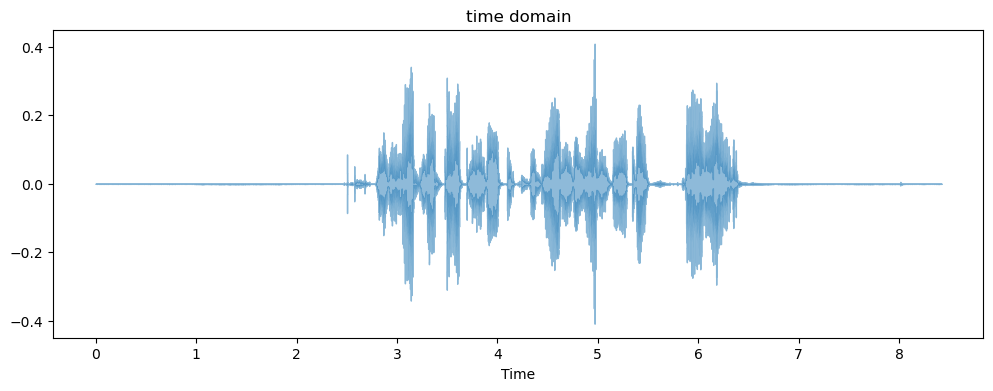

In [20]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(y,sr=sr,alpha=0.5)
plt.title('time domain')
plt.show()



## spectrogram

-spectrogram provide inormation from 3 dimensions of visualization 
x-axis provides time information
y-axis provides frequency information
and color of signal provides amplitude information

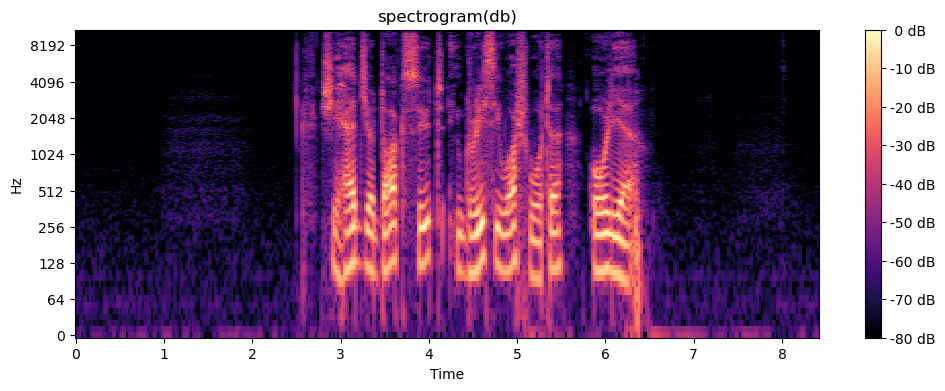

In [25]:
from librosa import stft


plt.figure(figsize=(12,4))
#for displaying compute the shift(frequency display purpose)
#since speech signsls are not periodic nut are periodic during short burst of 30ms time 
#stft computes fft on thses short burst,which help us to analyze frquency components
#compute stft
D=librosa.amplitude_to_db(np.abs(librosa.stft(y)),ref=np.max)
librosa.display.specshow(D,sr=sr,x_axis='time',y_axis='log')
plt.title('spectrogram(db)')
plt.colorbar(format='%2.0f dB')
plt.show()

Extracting the features of signal

## spectral features
-Spectral centroid it indicates central mass of signal spectrum perceceived brightness
-music genre classification: Rock music has higher centroid than classical music
-spectral rolloff: it is frequency below which 85% of the signal energy is concentrated
-spectral bandwidth: spread of spectrum around centroid



## Pitch analysis
-fundamental frequency(pitch)
-perceived pitch of voice
-male pitch 85-100hz
-female 165-255hz
    -pitch std:measures the variability of pitch :
    -emotion detection 

# Zero Crossing
-rate of sign changes +VE,-VE ,indicates noise or pitch

In [28]:
# feature extraction
Energy=np.sum(y**2)
print("Energy:",Energy)
from scipy.stats import entropy
entropy_energy=entropy(np.abs(y)+1e-10)
print("Entropy:",entropy_energy)
print("RMS:",(np.mean(librosa.feature.rms(y=y)[0])))

Energy: 254.36412
Entropy: 10.71372
RMS: 0.020813635


Centroid: [3469.30671931 3479.11265036 3356.66391499 3446.79360129 3577.15181342
 3587.16034702 3733.81162326 3652.11752698 3512.54479728 3434.18547361
 3516.5747988  3702.50098933 3550.93193814 3484.10985284 3461.43086234
 3653.21921046 3698.40759948 3752.42703132 3634.96577964 3550.8780188
 3582.09659545 3605.67541614 3684.57855556 3626.59489742 3649.81218129
 3713.16747979 3502.74266347 3421.05915122 3454.30259292 3641.09665981
 3606.44930698 3403.47308782 3546.25947196 3455.57864657 3360.52456278
 3522.44728565 3691.4582118  3936.41555687 3654.25409877 3431.17426034
 3681.15575446 3574.78892748 3154.64268275 2793.37048267 2736.64880085
 2691.57662738 2576.46115896 2791.29359667 2823.33171492 2705.40033536
 2780.53411862 2862.09903589 2775.45334538 2699.60902444 2687.68198472
 2696.4278051  2863.65714205 2768.93495695 2822.53717575 2786.32808546
 2718.89459399 2707.99193453 2813.21994208 2782.10502035 2770.34124762
 2792.99654507 2790.7093439  2881.60023916 2778.20763565 2826.220069

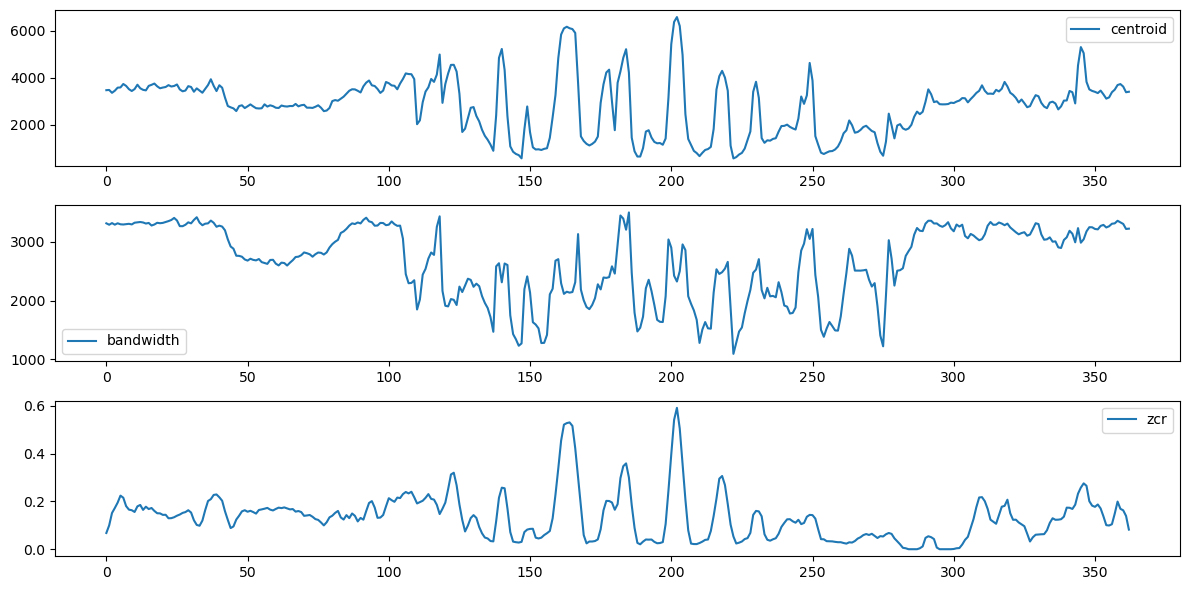

In [31]:
#spec features
centroid=librosa.feature.spectral_centroid(y=y,sr=sr)[0]
rolloff=librosa.feature.spectral_rolloff(y=y,sr=sr,roll_percent=0.85)[0]
bandwidth=librosa.feature.spectral_bandwidth(y=y,sr=sr)[0]
print("Centroid:",centroid)
print("Rolloff:",rolloff)
print("Bandwidth:",bandwidth)
zcr=librosa.feature.zero_crossing_rate(y=y)[0]
print("Zero Crossing Rate:",zcr)

plt.figure(figsize=(12,6))
plt.subplot(3,1,1);plt.plot(centroid,label="centroid");plt.legend()
plt.subplot(3,1,2);plt.plot(bandwidth,label="bandwidth");plt.legend()
plt.subplot(3,1,3);plt.plot(zcr,label="zcr");plt.legend()
plt.tight_layout()
plt.show()



